In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import warnings
warnings.filterwarnings("ignore")

In [2]:
url = 'DATA_Customer_Churn.csv'

churnData = pd.read_csv(url)

In [3]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


Check the datatypes of all the columns in the data. 


You will see that the column __TotalCharges__ is object type. Convert this column into numeric type using __pd.to_numeric__ function.

In [4]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
# total_charges = pd.Series(churnData['TotalCharges'])

# pd.to_numeric(total_charges)

Seems we might have an issue of missing values / NA's

In [6]:
churnData['TotalCharges'].iloc[488]

' '

In [7]:
len(churnData[churnData['tenure'] == 0])

11

In [8]:
churnData[churnData['TotalCharges'] == ' '] 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,Yes,No,Yes,Yes,Yes,No,Two year,52.55,,No
753,Male,0,No,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.25,,No
936,Female,0,Yes,Yes,0,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.75,,No
1340,Female,0,Yes,Yes,0,No,Yes,Yes,Yes,Yes,Yes,No,Two year,56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Two year,73.35,,No


In [9]:
## Setting missing values of TotalCharges to equal the Monthly Charges as they have tenure of 0 they are no populated 

churnData.loc[churnData['TotalCharges'] == ' ', 'TotalCharges'] = churnData['MonthlyCharges']



In [10]:
churnData['TotalCharges'] = churnData['TotalCharges'].astype(float)

In [11]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

Check for null values in the dataframe. Replace the null values.


In [12]:
churnData.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:


Split the data into a training set and a test set.


Scale the features either by using normalizer or a standard scaler.


Fit a logistic Regression model on the training data.


Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [13]:
df = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

In [14]:
churnData['Churn'] = churnData['Churn'].apply(lambda x: 0 if x == 'No' else 1)

In [15]:
churnData['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [16]:
X = df
y = churnData[['Churn']]

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   SeniorCitizen   7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


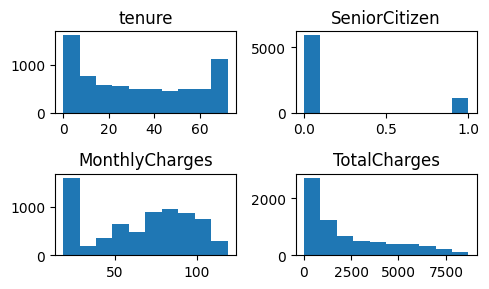

In [18]:
X.hist(figsize=(5,3), grid=False)
plt.tight_layout()

### Transforming 

#### Round 2

- Fit a Decision Tree Classifier on the training data.
- Check the error metric on the test data.
- Create a function that takes a list of integers and trains and tests a Decision Tree Classifier using each integer as max_depth

In [19]:
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree



In [21]:
model = DecisionTreeClassifier(max_depth=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.788438,0.777094
1,Precision,0.633758,0.623501
2,Recall,0.461004,0.452962


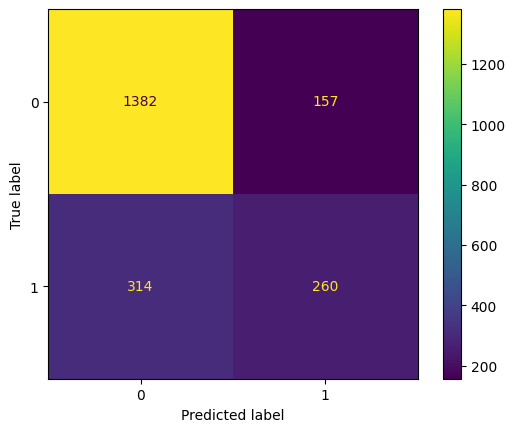

In [22]:
cm = confusion_matrix(y_test, y_pred_test_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

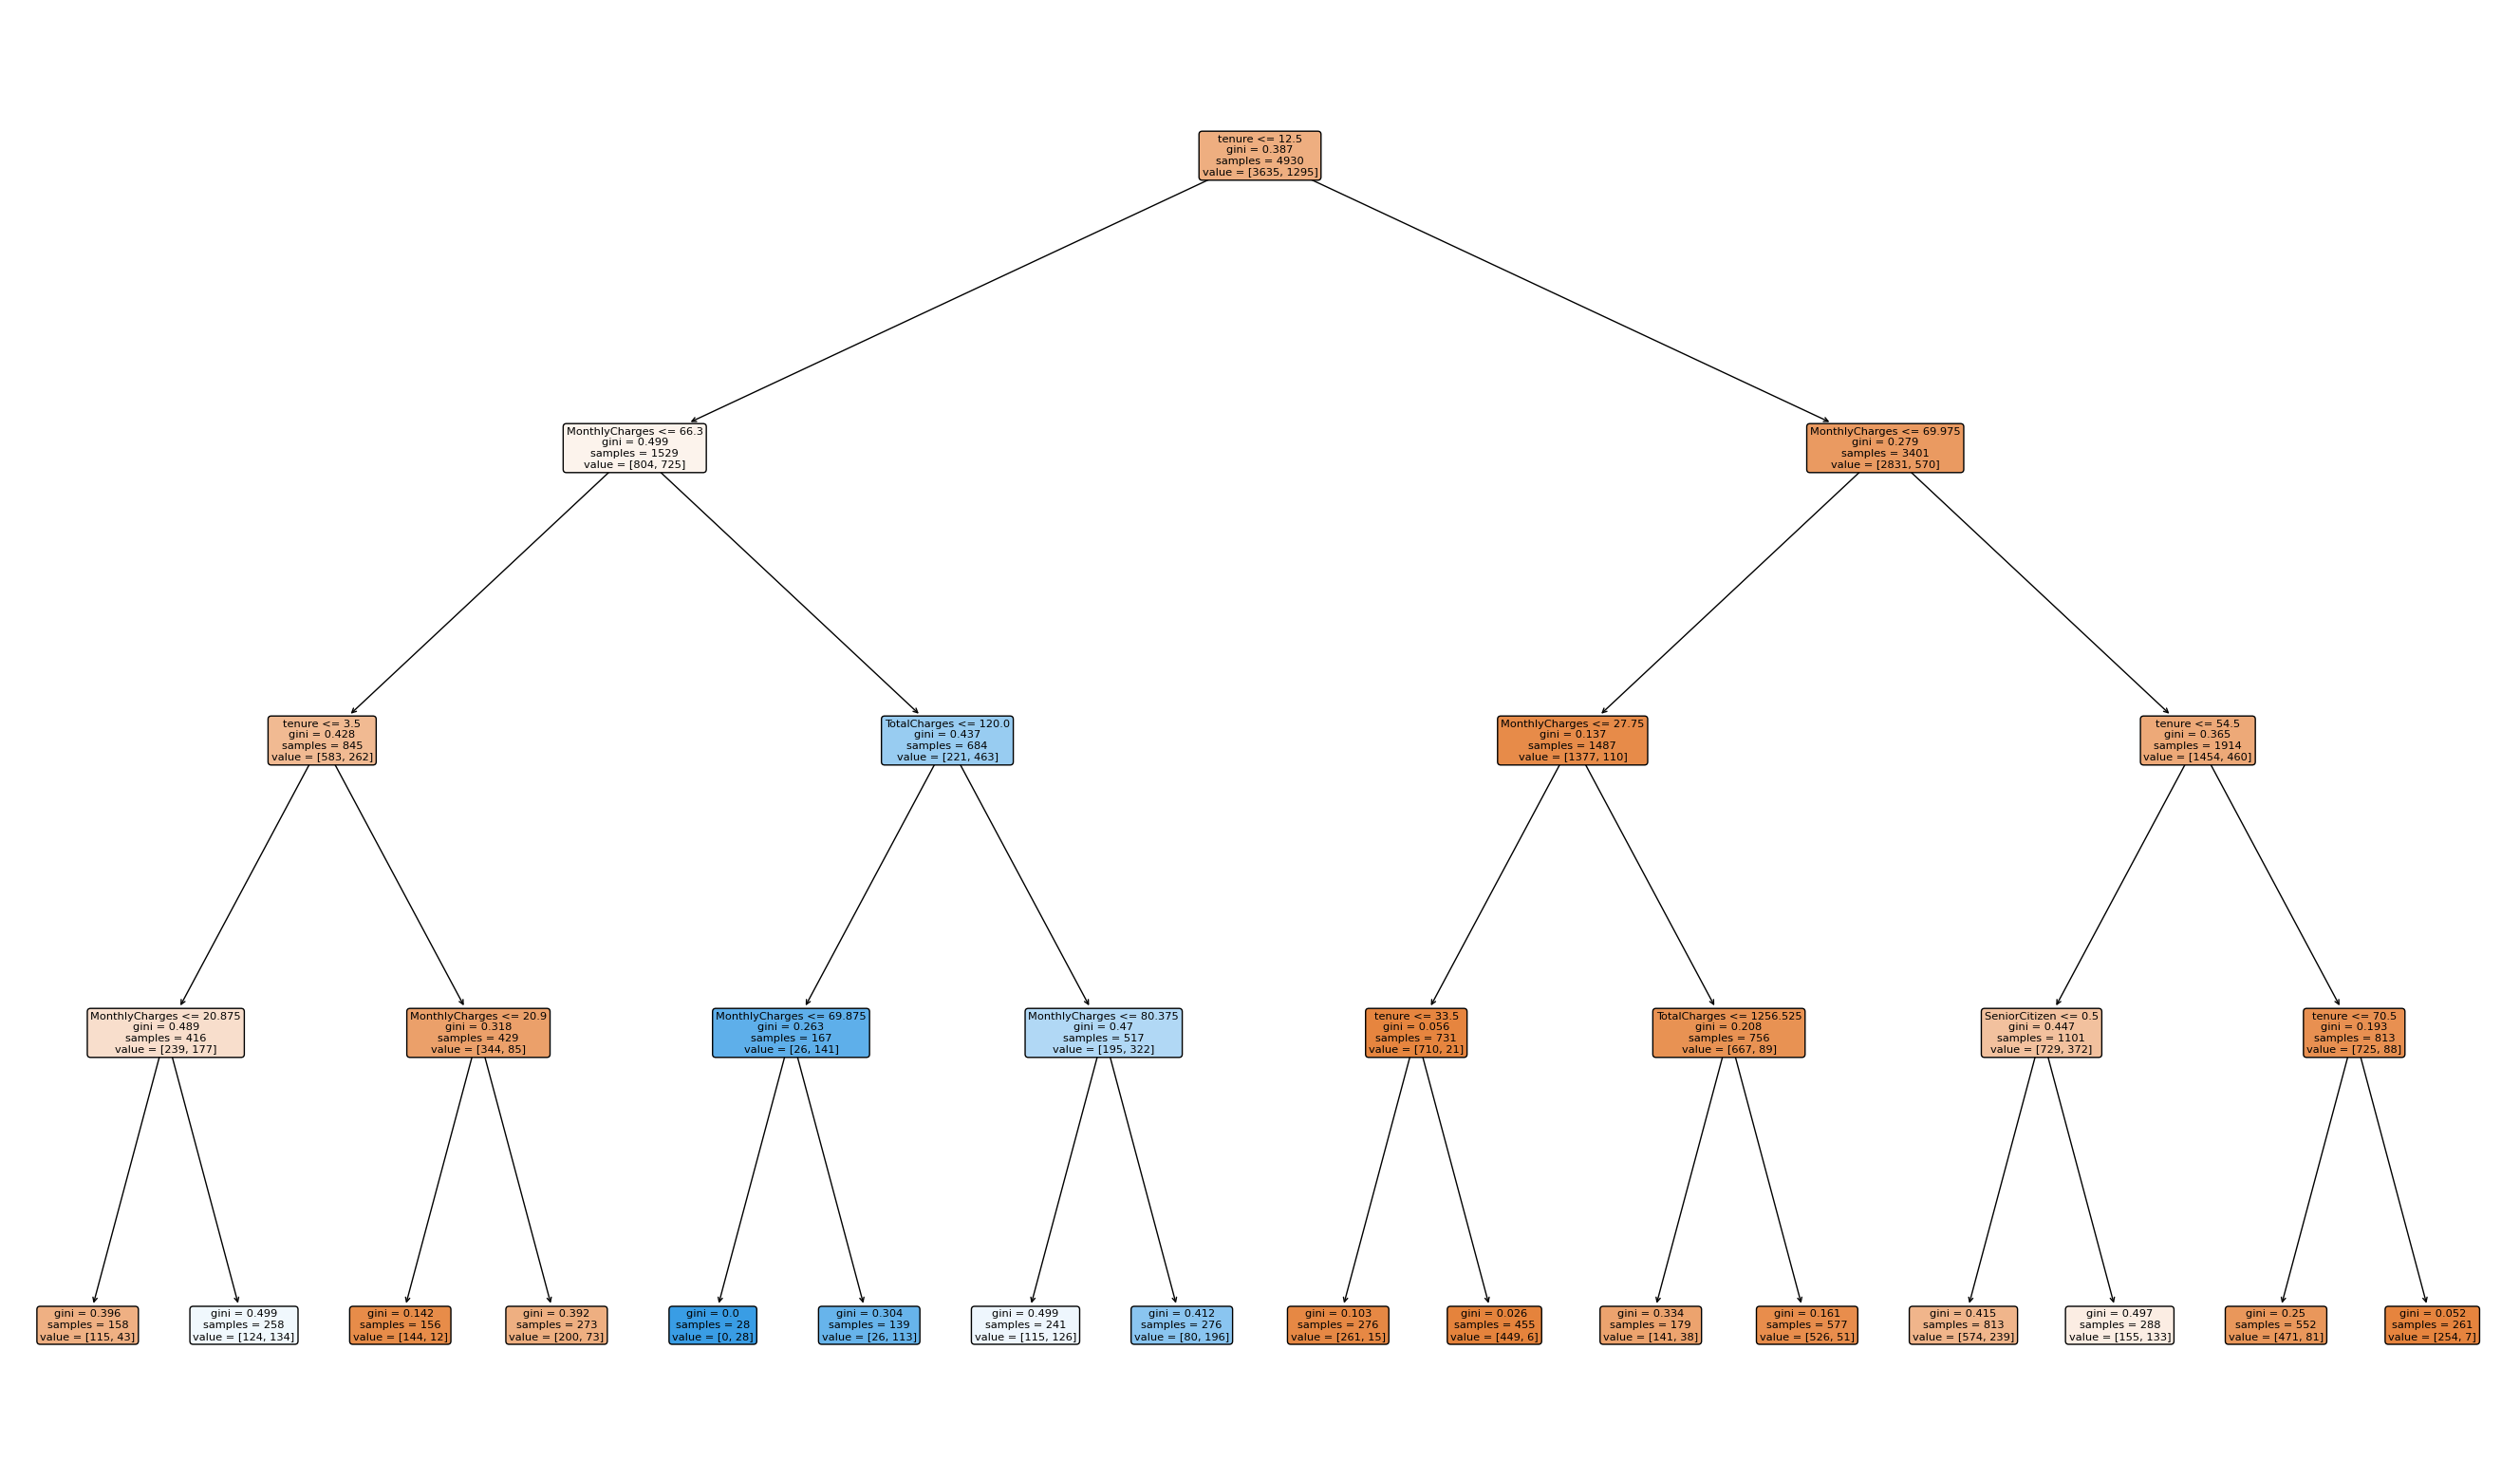

In [23]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=list(X.columns))
plt.show() 

<BarContainer object of 4 artists>

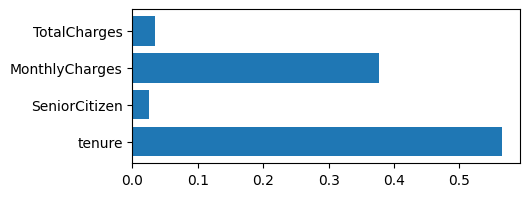

In [24]:
plt.figure(figsize=(5,2))
plt.barh(X.columns,model.feature_importances_)



Create a function that takes a list of integers and trains and tests a Decision Tree Classifier using each integer as max_depth



In [25]:


def tree_trainer(lst):
    
    for i in lst:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(X_train, y_train)

        y_pred_train_dt = model.predict(X_train)
        y_pred_test_dt = model.predict(X_test)
        
        
        print(f'''Error Metric for Depth {i}\n{"*"*40}
        Train:\n{"-"*25}
        Accuracy: {accuracy_score(y_train, y_pred_train_dt)}
        Precision: {precision_score(y_train, y_pred_train_dt)}
        Recall: {recall_score(y_train, y_pred_train_dt)}
        
        Test:\n{"-"*25}
        Accuracy: {accuracy_score(y_test, y_pred_test_dt)}
        Precision: {precision_score(y_test, y_pred_test_dt)}
        Recall: {recall_score(y_test, y_pred_test_dt)}\n''')







In [26]:
lst_int = [1,2,3]

In [27]:
tree_trainer(lst_int)

Error Metric for Depth 1
****************************************
        Train:
-------------------------
        Accuracy: 0.7373225152129818
        Precision: 0.0
        Recall: 0.0
        
        Test:
-------------------------
        Accuracy: 0.7283483199242783
        Precision: 0.0
        Recall: 0.0

Error Metric for Depth 2
****************************************
        Train:
-------------------------
        Accuracy: 0.7864097363083165
        Precision: 0.6769005847953217
        Recall: 0.3575289575289575
        
        Test:
-------------------------
        Accuracy: 0.7742546142924751
        Precision: 0.6611295681063123
        Recall: 0.34668989547038326

Error Metric for Depth 3
****************************************
        Train:
-------------------------
        Accuracy: 0.7864097363083165
        Precision: 0.6769005847953217
        Recall: 0.3575289575289575
        
        Test:
-------------------------
        Accuracy: 0.7742546142924751
  

### Round 3

apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [29]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [30]:
y_train.value_counts()

Churn
0        3635
1        1295
dtype: int64

In [31]:
pct = len(y_train[y_train['Churn'] == 0])/len(y_train['Churn'])

In [32]:
print(f'The majority class (client stays) represents {pct*100}%')

The majority class (client stays) represents 73.73225152129818%


In [33]:
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [34]:
print(X_sm.shape, y_sm.shape)
y_sm.value_counts()

(7270, 4) (7270, 1)


Churn
0        3635
1        3635
dtype: int64

In [35]:
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict


model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

# Create a list containing the models
model_pipeline = [model1, model2, model3]

#Define names for the models for readability
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']



scores = {}
# Initialize a counter variable

i=0
# Iterate over each model in the pipeline

for model in model_pipeline:
    # Calculate the mean recall score using 5-fold cross-validation
    mean_score = np.mean(cross_val_score(model, X_sm, y_sm, cv=5, scoring="recall"))
    # Store the mean recall score in the dictionary with the corresponding model name
    scores[model_names[i]] = mean_score
    # Increment the counter variable
    i = i+1
# Print the dictionary containing mean recall scores for each model
print(scores)

{'Classification Tree': 0.7620357634112793, 'Logistic Regression': 0.7862448418156808, 'KNN': 0.8247592847317744}
